# Overview
load the necessary libraries

In [1]:
from glob import glob
import os
import pptx

Find all presentations and take the first one

In [2]:
all_pptx = glob('../pptx/*.pptx')
cur_pptx = all_pptx[0]
print(len(all_pptx), 'found, taking first',cur_pptx)

1 found, taking first ../pptx/RSNA Slides - Improving Reading of T2 MRIs through Deep Learning.pptx


# Extract Text
Extract all the text from the presentation

In [3]:
cur_pres = pptx.Presentation(cur_pptx)
# text_runs will be populated with a list of strings,
# one for each text run in presentation
text_runs = []

for slide in cur_pres.slides:
    for shape in slide.shapes:
        if not shape.has_text_frame:
            continue
        for paragraph in shape.text_frame.paragraphs:
            for run in paragraph.runs:
                text_runs.append(run.text)
text_runs[:4], text_runs[-4:]

(['Improving Reading of T2 MRIs through Deep Learning',
  'K Mader (4Quant, Zurich, Switzerland)',
  'B Stieltjes, E Merkle (Unispital Basel, Switzerland)',
  'K Peng (Sun Yat Sun Cancer Center, Guangzhou, China)'],
 ['info@4quant.com', ',', 'bram.stieltjes@usb.ch', ''])

# Convert to PDF and PNGs

In [4]:
!libreoffice --headless --convert-to pdf '{cur_pptx}'

convert /home/jovyan/pptx/RSNA Slides - Improving Reading of T2 MRIs through Deep Learning.pptx -> /home/jovyan/notebooks/RSNA Slides - Improving Reading of T2 MRIs through Deep Learning.pdf using filter : impress_pdf_Export


In [5]:
cur_pdf = os.path.basename(cur_pptx.replace('.pptx', '.pdf'))
slide_dir = '../data/slides'
os.makedirs(slide_dir, exist_ok=True)
!convert -density 400 '{cur_pdf}' -resize 640x480 {slide_dir}/idx%04d.png

convert-im6.q16: DistributedPixelCache '127.0.0.1' @ error/distribute-cache.c/ConnectPixelCacheServer/244.
convert-im6.q16: cache resources exhausted `/tmp/magick-133f5owO3AiRE3v18' @ error/cache.c/OpenPixelCache/3982.


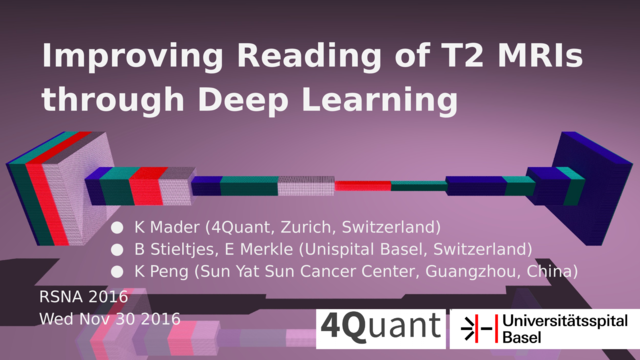

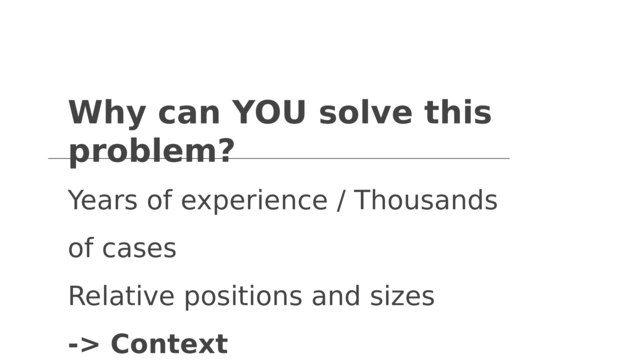

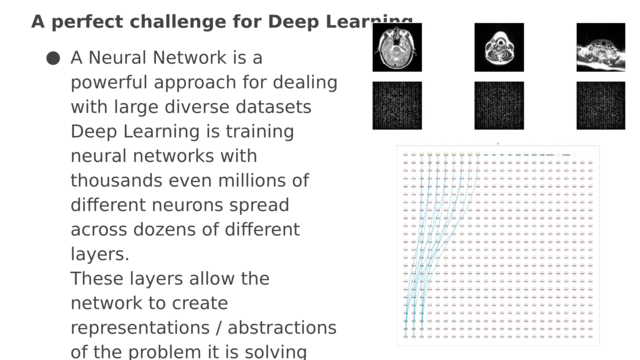

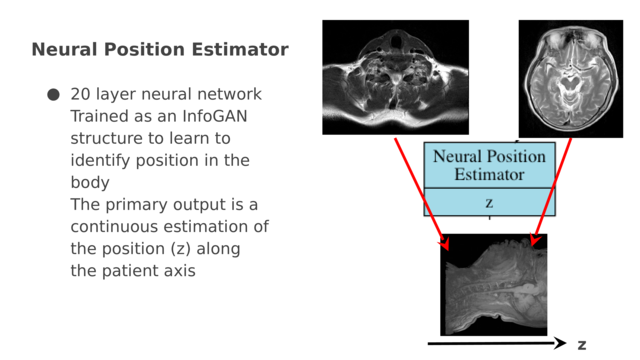

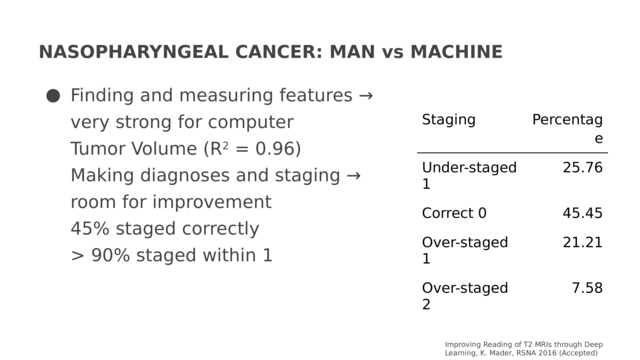

In [13]:
from IPython.display import Image, display
all_images = sorted(glob(os.path.join(slide_dir, '*.png')))
for i in all_images[::4]:
    display(Image(i))

# Upload Presentations

In [21]:
from fileupload import FileUploadWidget
FileUploadWidget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Access Presentations on Google Drive
Requires credentials (not binder-safe)

In [9]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

from oauth2client.client import GoogleCredentials

gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

ApplicationDefaultCredentialsError: The Application Default Credentials are not available. They are available if running in Google Compute Engine. Otherwise, the environment variable GOOGLE_APPLICATION_CREDENTIALS must be defined pointing to a file defining the credentials. See https://developers.google.com/accounts/docs/application-default-credentials for more information.